In [6]:
import pandas as pd

# Membaca file CSV
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

# Menampilkan lima baris pertama
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [8]:
# Mengecek missing value di setiap kolom
missing_values = data.isnull().sum()

# Menampilkan kolom dengan missing value (jika ada)
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


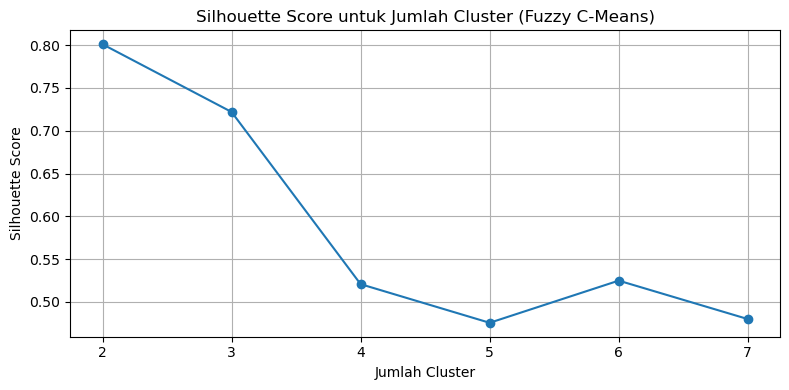

Jumlah cluster optimal: 2


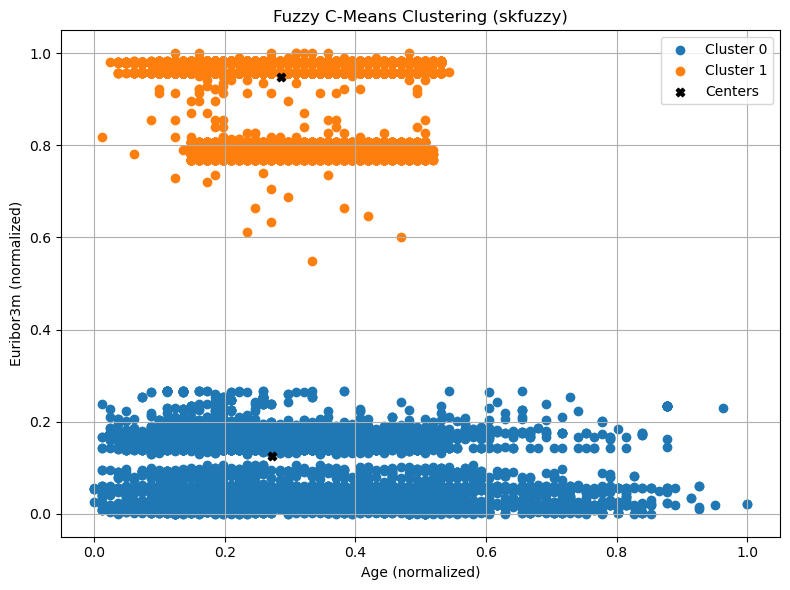

In [9]:
# Install scikit-fuzzy jika belum ada
!pip install scikit-fuzzy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Pilih dua fitur numerik
features = ['age', 'euribor3m']
X = df[features].values

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Transpose: skfuzzy membutuhkan shape (features, samples)
X_scaled_T = X_scaled.T

# Uji berbagai jumlah cluster
silhouette_scores = []
cluster_range = range(2, 8)

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_scaled_T, c, m=2.0, error=0.005, maxiter=1000, init=None)
    
    # Prediksi label berdasarkan nilai keanggotaan tertinggi
    labels = np.argmax(u, axis=0)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette score
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Jumlah Cluster (Fuzzy C-Means)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tentukan jumlah cluster optimal
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal: {optimal_k}")

# Jalankan FCM akhir
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled_T, optimal_k, m=2.0, error=0.005, maxiter=1000, init=None)

labels = np.argmax(u, axis=0)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i}')
plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', c='black', label='Centers')
plt.xlabel('Age (normalized)')
plt.ylabel('Euribor3m (normalized)')
plt.title('Fuzzy C-Means Clustering (skfuzzy)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Clustering Nasabah Bank Berdasarkan Karakteristik Sosial dan Respons terhadap Kampanye

age, job, education, housing, loan, duration, campaign, pdays, previous

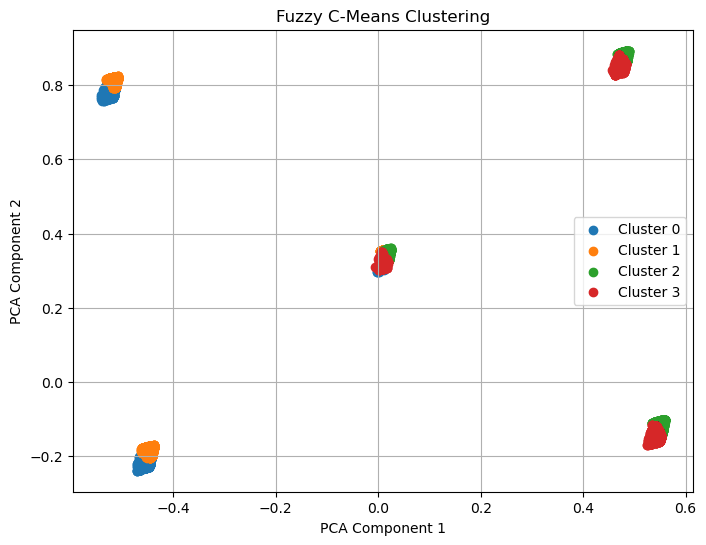

Fuzzy Partition Coefficient (FPC): 0.4688


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import skfuzzy as fuzz

# 1. Load dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')

# 2. Pilih atribut yang relevan
selected_cols = ['age', 'job', 'education', 'housing', 'loan', 
                 'duration', 'campaign', 'pdays', 'previous']
df_selected = df[selected_cols].copy()

# 3. Encoding kolom kategorik
label_encoders = {}
for col in ['job', 'education', 'housing', 'loan']:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

# 4. Normalisasi data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df_selected)

# 5. Transpose data agar cocok untuk skfuzzy
data_T = data_normalized.T

# 6. Fuzzy C-Means Clustering
n_clusters = 4  # kamu bisa eksplorasi nilai lain: 3–5
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# 7. Ambil cluster dari hasil probabilistik
cluster_membership = np.argmax(u, axis=0)

# 8. Tambahkan cluster ke DataFrame asli
df_selected['cluster'] = cluster_membership

# 9. Visualisasi cluster (menggunakan PCA untuk mereduksi ke 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(data_normalized)
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(components[cluster_membership == i, 0],
                components[cluster_membership == i, 1],
                label=f'Cluster {i}')
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 10. Tampilkan FPC (semakin mendekati 1, semakin baik)
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")


In [11]:
print(df_selected.groupby('cluster').mean())


               age       job  education   housing      loan    duration  \
cluster                                                                   
0        39.736915  7.434043   4.526383  1.999255  0.350106  254.587553   
1        40.195199  0.899440   3.243938  1.987998  0.344335  257.988241   
2        40.185370  0.957963   2.987037  0.036204  0.294167  261.822685   
3        39.890840  7.172346   4.566247  0.051288  0.320203  258.309114   

         campaign       pdays  previous  
cluster                                  
0        2.523723  952.300851  0.197979  
1        2.551131  966.543022  0.170789  
2        2.627500  969.313889  0.148796  
3        2.563937  959.198221  0.179046  


In [12]:
df_result = df.copy()
df_result['cluster'] = cluster_membership
df_result.to_csv('hasil_fuzzy_cluster.csv', index=False)


### Mengelompokkan nasabah berdasarkan karakteristik sosial dan ekonomi mereka.

 age (numerik)
 <br> job (kategorik – perlu di-encode)
 <br> education (kategorik)
 <br> marital (kategorik)
 <br> housing (binary: yes/no → 1/0)
 <br> loan (binary)

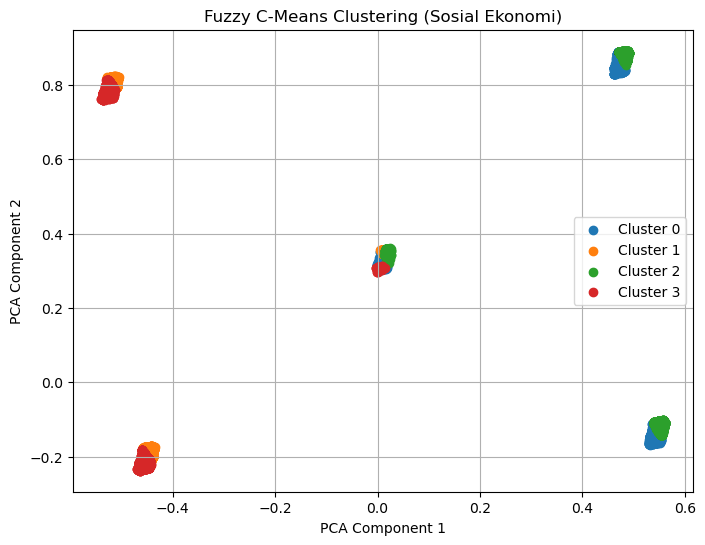

Rata-rata atribut per cluster:
               age       job  education   marital   housing      loan
cluster                                                              
0        39.957909  7.001924   4.624915  1.177189  0.045599  0.313306
1        40.270881  0.913622   3.205057  1.152202  1.988010  0.338581
2        40.164744  0.958956   2.901551  1.152922  0.036599  0.296482
3        39.611181  7.375368   4.570092  1.217213  1.994430  0.360551

Fuzzy Partition Coefficient (FPC): 0.4306


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import skfuzzy as fuzz
from sklearn.decomposition import PCA

# 1. Load data
df = pd.read_csv("bank-additional-full.csv", sep=';')

# 2. Pilih atribut sosial-ekonomi
cols = ['age', 'job', 'education', 'marital', 'housing', 'loan']
df_soc = df[cols].copy()

# 3. Encode kategorik
label_encoders = {}
for col in ['job', 'education', 'marital', 'housing', 'loan']:
    le = LabelEncoder()
    df_soc[col] = le.fit_transform(df_soc[col])
    label_encoders[col] = le

# 4. Normalisasi data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df_soc)

# 5. Transpose untuk skfuzzy
data_T = data_norm.T

# 6. Fuzzy C-Means
n_clusters = 4  # disesuaikan, bisa dicoba 3–5 juga
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# 7. Ambil cluster dominan untuk tiap anggota
cluster_membership = np.argmax(u, axis=0)

# 8. Tambahkan hasil cluster ke dataframe
df_soc['cluster'] = cluster_membership

# 9. Visualisasi dengan PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data_norm)
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(components[cluster_membership == i, 0],
                components[cluster_membership == i, 1],
                label=f'Cluster {i}')
plt.title("Fuzzy C-Means Clustering (Sosial Ekonomi)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluasi hasil rata-rata per cluster
print("Rata-rata atribut per cluster:")
print(df_soc.groupby('cluster').mean())

# 11. FPC (Fuzzy Partition Coefficient)
print(f"\nFuzzy Partition Coefficient (FPC): {fpc:.4f}")


In [14]:
print(df_soc.groupby('cluster').mean())


               age       job  education   marital   housing      loan
cluster                                                              
0        39.957909  7.001924   4.624915  1.177189  0.045599  0.313306
1        40.270881  0.913622   3.205057  1.152202  1.988010  0.338581
2        40.164744  0.958956   2.901551  1.152922  0.036599  0.296482
3        39.611181  7.375368   4.570092  1.217213  1.994430  0.360551


### Memahami kelompok nasabah berdasarkan seberapa sering dan bagaimana mereka dihubungi.
 <br> contact (type of communication: cellular/telephone)
 <br> campaign (jumlah kontak selama kampanye)
 <br> pdays (hari sejak nasabah terakhir dihubungi)
 <br> previous (jumlah kontak sebelumnya)
 <br> duration (lama panggilan)

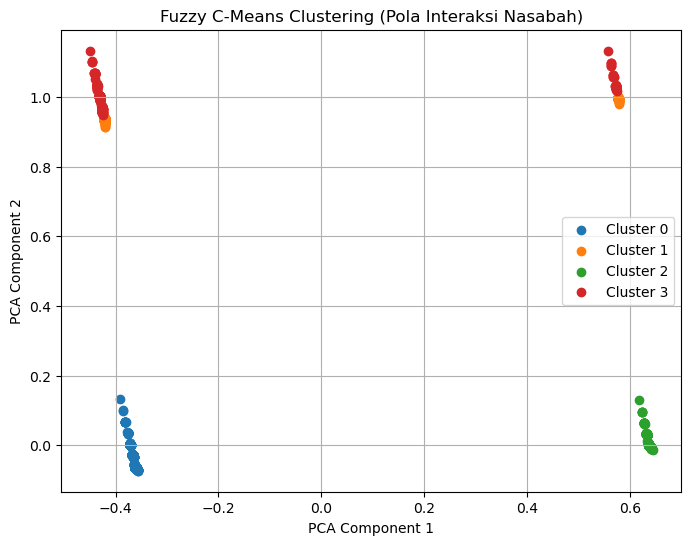

Rata-rata atribut per cluster:
          contact  campaign       pdays  previous    duration
cluster                                                      
0        0.000000  2.438809  999.000000  0.172985  260.539932
1        0.072832  1.798844    6.047399  1.000000  317.539884
2        1.000000  2.856607  999.000000  0.021968  248.135624
3        0.076923  1.853846    5.970769  2.540000  326.736923

Fuzzy Partition Coefficient (FPC): 0.9585


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import skfuzzy as fuzz
from sklearn.decomposition import PCA

# 1. Load data
df = pd.read_csv("bank-additional-full.csv", sep=';')

# 2. Pilih atribut interaksi nasabah
cols = ['contact', 'campaign', 'pdays', 'previous', 'duration']
df_interaction = df[cols].copy()

# 3. Encode kolom kategorik (contact)
label_encoder = LabelEncoder()
df_interaction['contact'] = label_encoder.fit_transform(df_interaction['contact'])

# 4. Normalisasi data (skala antara 0 dan 1)
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df_interaction)

# 5. Transpose untuk skfuzzy
data_T = data_norm.T

# 6. Fuzzy C-Means
n_clusters = 4  # disesuaikan, bisa dicoba 3-5 cluster juga
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# 7. Ambil cluster dominan untuk tiap anggota
cluster_membership = np.argmax(u, axis=0)

# 8. Tambahkan hasil cluster ke dataframe
df_interaction['cluster'] = cluster_membership

# 9. Visualisasi dengan PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data_norm)
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(components[cluster_membership == i, 0],
                components[cluster_membership == i, 1],
                label=f'Cluster {i}')
plt.title("Fuzzy C-Means Clustering (Pola Interaksi Nasabah)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluasi hasil rata-rata per cluster
print("Rata-rata atribut per cluster:")
print(df_interaction.groupby('cluster').mean())

# 11. FPC (Fuzzy Partition Coefficient)
print(f"\nFuzzy Partition Coefficient (FPC): {fpc:.4f}")


In [16]:
print(df_interaction.groupby('cluster')[['contact','campaign','pdays','previous','duration']].mean())


          contact  campaign       pdays  previous    duration
cluster                                                      
0        0.000000  2.438809  999.000000  0.172985  260.539932
1        0.072832  1.798844    6.047399  1.000000  317.539884
2        1.000000  2.856607  999.000000  0.021968  248.135624
3        0.076923  1.853846    5.970769  2.540000  326.736923


#### Evaluasi untuk clustering  "memahami kelompok nasabah berdasarkan seberapa sering dan bagaimana mereka dihubungi"

Fuzzy Partition Coefficient (FPC): 0.9585
Silhouette Score: 0.8883

Evaluasi untuk 2 Cluster:
FPC: 0.9694
Silhouette Score: 0.8537

Evaluasi untuk 3 Cluster:
FPC: 0.9735
Silhouette Score: 0.9004

Evaluasi untuk 4 Cluster:
FPC: 0.8902
Silhouette Score: 0.7239

Evaluasi untuk 5 Cluster:
FPC: 0.8328
Silhouette Score: 0.6777

Evaluasi untuk 6 Cluster:
FPC: 0.7492
Silhouette Score: 0.5195


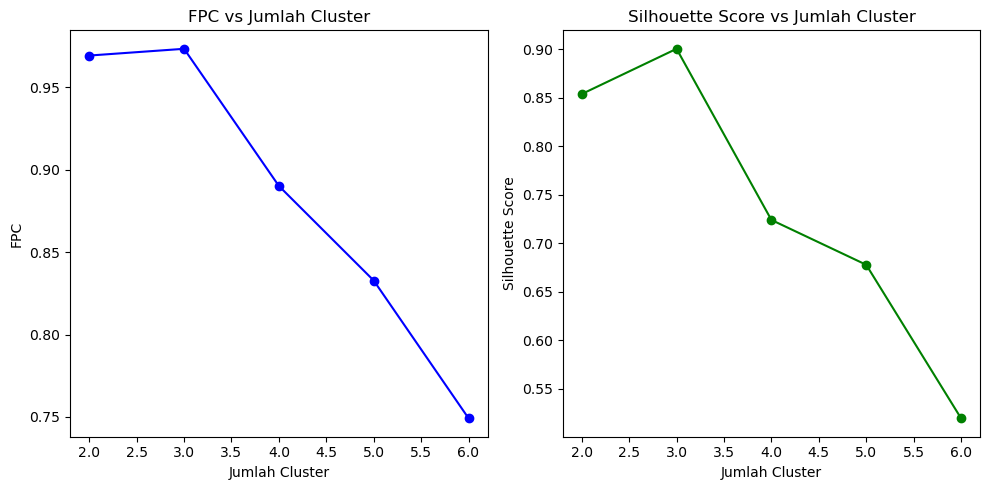

In [17]:
from sklearn.metrics import silhouette_score

# 1. Evaluasi menggunakan Fuzzy Partition Coefficient (FPC)
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

# 2. Evaluasi menggunakan Silhouette Score
# Silhouette Score hanya dapat dihitung untuk clustering keras, jadi kita akan ambil hasil cluster dominan untuk Fuzzy C-Means
dominant_clusters = np.argmax(u, axis=0)

sil_score = silhouette_score(data_norm, dominant_clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# 3. Evaluasi Jumlah Cluster (Mencoba beberapa nilai k untuk melihat pengaruh FPC dan Silhouette Score)
fpcs = []
sil_scores = []

for n_clusters in range(2, 7):  # Menguji cluster dari 2 hingga 6
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)
    
    dominant_clusters = np.argmax(u, axis=0)
    sil_score = silhouette_score(data_norm, dominant_clusters)
    
    fpcs.append(fpc)
    sil_scores.append(sil_score)
    
    print(f"\nEvaluasi untuk {n_clusters} Cluster:")
    print(f"FPC: {fpc:.4f}")
    print(f"Silhouette Score: {sil_score:.4f}")

# 4. Menampilkan hasil untuk berbagai jumlah cluster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 7), fpcs, marker='o', linestyle='-', color='b')
plt.title("FPC vs Jumlah Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("FPC")

plt.subplot(1, 2, 2)
plt.plot(range(2, 7), sil_scores, marker='o', linestyle='-', color='g')
plt.title("Silhouette Score vs Jumlah Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
